In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from pandas.api.types import CategoricalDtype

In [12]:
df = pd.read_csv("dailyActivity_merged.csv")

In [15]:
df.shape

(940, 15)

In [16]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [17]:
df.head(8)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035


In [18]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [19]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%m/%d/%Y")
df.dtypes # After reformating. We double check the data type


Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [20]:
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']
# We also notice that 'LoggedActivitiesDistance' have 0.0 in value in most entries, but we filter to find where has more than 0
df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


In [21]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

In [22]:
## renaming columns
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) # We make the changes permanent by using inplace=True
print('Double check the name of the columns:')
df.columns

Double check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes'],
      dtype='object')

In [24]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 represents monday, 6 represents sunday

## Checking empty cells and null value

In [25]:
print('Total number of null values are: ')
print(df.isna().sum())

Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


In [26]:
## Checking for duplicate entries
print('Total number of duplicated values are: ',df.duplicated().sum())


Total number of duplicated values are:  0


## Subsetting the data

In [27]:
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes', 
       'day_of_week', 'n_day_of_week'
        ]].copy()

## Category creation

In [28]:
# I first group the data by the id
id_grp = df.groupby(['id'])

# Then I look for the average amount of steps, and sort the results in descending order
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# After that, I turn the results into a dataframe
id_avg_step = id_avg_step.to_frame()

# I want to create a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (id_avg_step <=6000),
    (id_avg_step > 6000) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
] # These are the conditions

values = ['sedentary','active','very_active'] # And here are the name of the values

# I create a column with the numpy function, np.select to asign each id a category
id_avg_step['activity_level'] = np.select(conditions,values)

# I store the results in a variable to use it in the next step
id_activity_level = id_avg_step['activity_level']

# I use a list comprehension to create the column in our original dataset.
# With this list comprehension I retrieve the categories where the index match the id column
df['activity_level'] = [id_activity_level[c] for c in df['id']]

## Analyze

In [29]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


In [30]:
print('How many times each id appear in the dataset?')
print(df['id'].value_counts())

How many times each id appear in the dataset?
id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


In [31]:
print('The min date is:',min(df['activity_date']))
print('The max date is:',max(df['activity_date']))
print('The number of unique dates are:',df['activity_date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


In [32]:
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


## Correlation between calories steps and calories

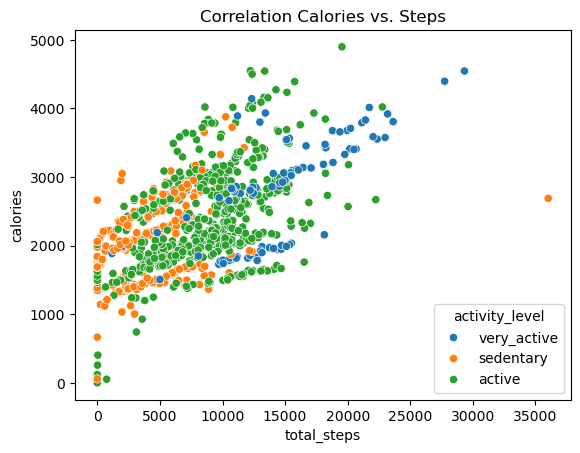

In [33]:
ax =sns.scatterplot(x='total_steps', y='calories', data=df,hue='activity_level')

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, day_of_week, fontsize=7)
plt.title('Correlation Calories vs. Steps')

plt.show()

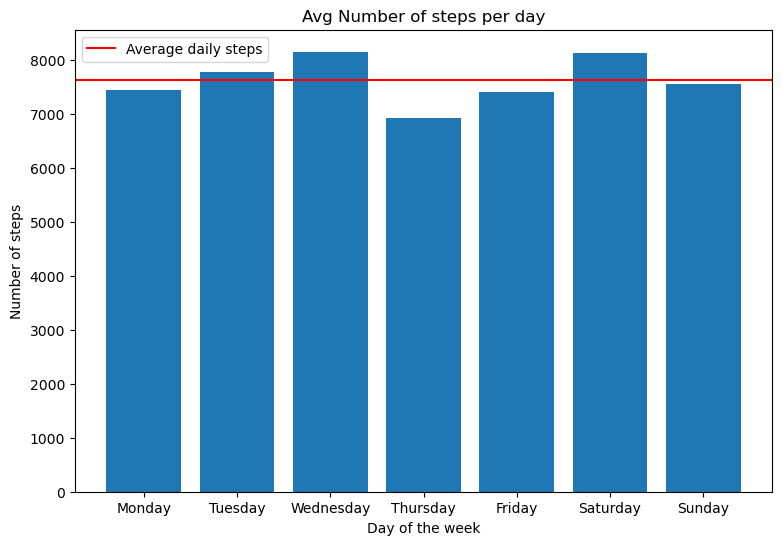

In [34]:
## Average number of steps per day

day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')

plt.legend()
plt.show()

## Percentage of activity in minutes

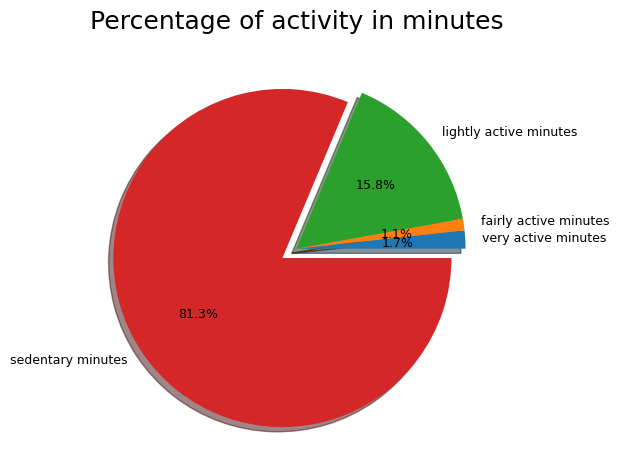

In [35]:
very_active_mins = df['very_active_minutes'].sum() 
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()


## Correlation Between activity level minutes and calories

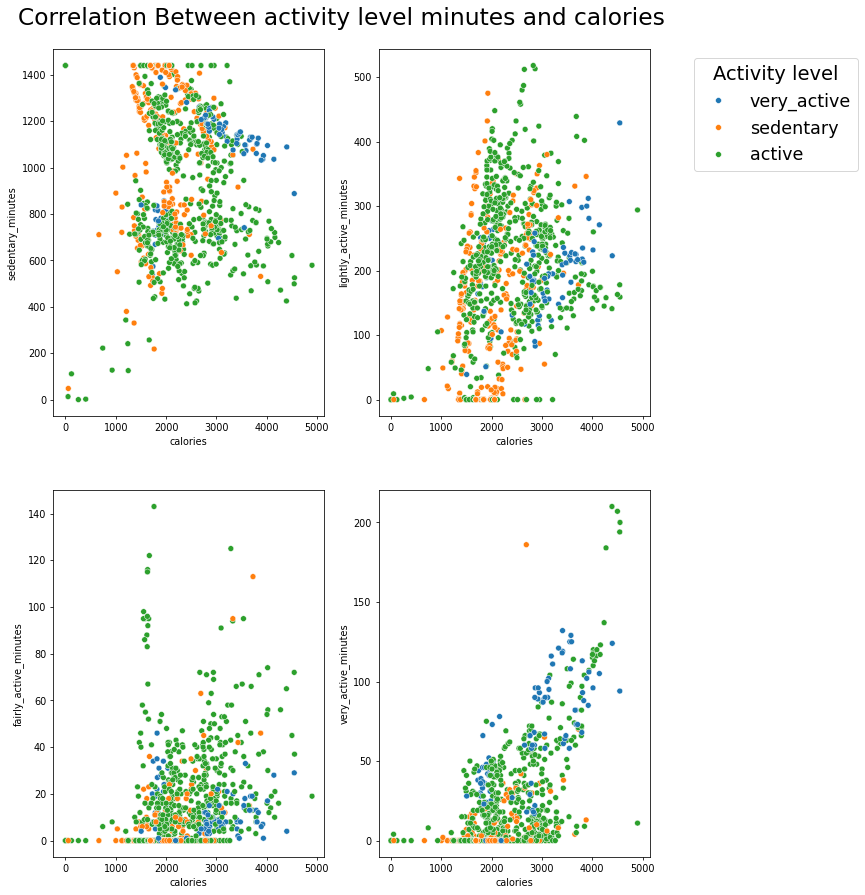

In [36]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()
